# Os Pandas e os Gráficos

In [45]:
# Prepara os pacotes necessários
!pip install pandas
!pip install openpyxl

# Para carregamento de outros formatos
!pip install Beautifulsoup4 html5lib lxml
!pip install xlrd
!pip install matplotlib


No Pandas nós temos 2 maneira diferentes de selecionar dados, por meio dos seus labels (loc) e por meio dos seus índices de linha e coluna (iloc).


In [46]:
# Inicialmente vamos carregar a biblioteca
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.float_format', lambda x: '%.5f' % x) # Configuração para exibição de valores

In [47]:
# Agora vamos carregar os dados
df_simba = pd.read_csv("dados/Arquivo_Simba.csv", thousands=',')

df_simba

,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,CPF_CNPJ_TITULAR,DESCRICAO_LANCAMENTO,CNAB,...,NATUREZA_LANCAMENTO,VALOR_SALDO,NATUREZA_SALDO,CPF_CNPJ_OD,NOME_PESSOA_OD,TIPO_PESSOA_OD,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,OBSERVACAO
0,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,TARIFA DE MANUTENCAO DE CONTA,105,...,D,1101,C,XXXXn,NaN,nan,0,0,0.00000,NaN
1,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,DEPOSITO BLOQUEAD.20DIAS UTEIS,205,...,*,1101,C,XXXXn,NaN,nan,1,0,0.00000,NaN
2,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,TRANSFERENCIA,117,...,D,0,C,XXXXn,NaN,nan,1,0,0.00000,NaN
3,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,DESBLOQUEIO DE DEPOSITO,201,...,C,1101,C,XXXXn,NaN,nan,1,0,0.00000,NaN
4,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,TRANSFERENCIA DE SALDO,104,...,D,0,C,XXXXn,NaN,nan,1,0,0.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,001-MPF-000000-00,237,BANCO BRADESCO S/A,3090,13131,2,ASTRONALFAS SA TECNOLOGIA,11223397000199,IMPOSTO RENDA NA FONTE*,111,...,D,41025,C,XXXXn,BRENDA BUDDY,nan,0,0,nan,PAGAMENTO DE IMPOSTO
6190,001-MPF-000000-00,237,BANCO BRADESCO S/A,3090,13131,2,ASTRONALFAS SA TECNOLOGIA,11223397000199,RENDIMENTOS,205,...,C,4165,C,XXXXn,FRISKY PUPPY S/A,nan,0,0,nan,RENDIMENTOS POUPANCA
6191,001-MPF-000000-00,237,BANCO BRADESCO S/A,3090,13131,2,ASTRONALFAS SA TECNOLOGIA,11223397000199,IMPOSTO RENDA NA FONTE*,111,...,D,4151,C,XXXXn,BRENDA BUDDY,nan,0,0,nan,PAGAMENTO DE IMPOSTO
6192,001-MPF-000000-00,237,BANCO BRADESCO S/A,3090,13131,2,ASTRONALFAS SA TECNOLOGIA,11223397000199,RENDIMENTOS,205,...,C,42032,C,XXXXn,FRISKY PUPPY S/A,nan,0,0,nan,RENDIMENTOS POUPANCA


### Primeiro vamos conhecer os nossos dados um pouco melhor

In [48]:
df_simba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NUMERO_CASO                 6194 non-null   object 
 1   NUMERO_BANCO                6194 non-null   int64  
 2   NOME_BANCO                  6194 non-null   object 
 3   NUMERO_AGENCIA              6194 non-null   int64  
 4   NUMERO_CONTA                6194 non-null   int64  
 5   TIPO                        6194 non-null   int64  
 6   NOME_TITULAR                6194 non-null   object 
 7   CPF_CNPJ_TITULAR            6194 non-null   int64  
 8   DESCRICAO_LANCAMENTO        6194 non-null   object 
 9   CNAB                        6194 non-null   int64  
 10  DATA_LANCAMENTO             6194 non-null   object 
 11  NUMERO_DOCUMENTO            6194 non-null   object 
 12  NUMERO_DOCUMENTO_TRANSACAO  3136 non-null   object 
 13  LOCAL_TRANSACAO             328 n

In [49]:
df_simba.describe()

,NUMERO_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,CPF_CNPJ_TITULAR,CNAB,VALOR_TRANSACAO,VALOR_SALDO,TIPO_PESSOA_OD,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD
count,6194.00000,6194.00000,6194.00000,6194.00000,6194.00000,6194.00000,6194.00000,6194.00000,2718.00000,6194.00000,6194.00000,4228.00000
mean,294.76074,2634.13432,36852.86487,1.01162,11223397000199.00000,151.53826,879369.73297,14683554.72328,1.87601,167.97788,1327.83855,212866623771967456.00000
std,206.70579,1488.55926,29320.76639,0.11999,0.00000,49.49307,4786533.22988,39059405.99032,0.32963,195.67715,2323.57622,4609378843102895104.00000
min,1.00000,1.00000,10101.00000,1.00000,11223397000199.00000,101.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,104.00000,3306.00000,12226.00000,1.00000,11223397000199.00000,110.00000,1324.00000,21335.00000,2.00000,0.00000,0.00000,121748.00000
50%,237.00000,3389.00000,12226.00000,1.00000,11223397000199.00000,120.00000,27000.00000,2112617.00000,2.00000,104.00000,95.00000,751115.00000
75%,237.00000,3389.00000,63333.00000,1.00000,11223397000199.00000,209.00000,104043.75000,18041325.25000,2.00000,341.00000,1770.00000,8222589.00000
max,745.00000,6260.00000,98962.00000,3.00000,11223397000199.00000,999.00000,120958988.00000,607593967.00000,2.00000,756.00000,9999.00000,100000000000000000000.00000


### Vamos avaliar os dados e selecionar

In [50]:
# Verificando dados únicos
df_simba.NOME_BANCO.unique()

df_simba.NATUREZA_LANCAMENTO.unique()

df_simba_cred_deb = df_simba[~(df_simba['NATUREZA_LANCAMENTO'] == '*')]

df_simba_cred_deb

,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,CPF_CNPJ_TITULAR,DESCRICAO_LANCAMENTO,CNAB,...,NATUREZA_LANCAMENTO,VALOR_SALDO,NATUREZA_SALDO,CPF_CNPJ_OD,NOME_PESSOA_OD,TIPO_PESSOA_OD,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,OBSERVACAO
0,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,TARIFA DE MANUTENCAO DE CONTA,105,...,D,1101,C,XXXXn,NaN,nan,0,0,0.00000,NaN
2,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,TRANSFERENCIA,117,...,D,0,C,XXXXn,NaN,nan,1,0,0.00000,NaN
3,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,DESBLOQUEIO DE DEPOSITO,201,...,C,1101,C,XXXXn,NaN,nan,1,0,0.00000,NaN
4,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,TRANSFERENCIA DE SALDO,104,...,D,0,C,XXXXn,NaN,nan,1,0,0.00000,NaN
5,001-MPF-000000-00,1,Banco do Brasil,929,59137,1,ASTRONALFAS SA ASTRONOMIA,11223397000199,REMUNERACAO SOBRE ACOES,210,...,C,1252,C,XXXX1279067000079,MAC FRITZ-CARLOS PARTICIPACOES,2.00000,1,9868,59195.00000,PAGAMENTO DE RENDIMENTOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,001-MPF-000000-00,237,BANCO BRADESCO S/A,3090,13131,2,ASTRONALFAS SA TECNOLOGIA,11223397000199,IMPOSTO RENDA NA FONTE*,111,...,D,41025,C,XXXXn,BRENDA BUDDY,nan,0,0,nan,PAGAMENTO DE IMPOSTO
6190,001-MPF-000000-00,237,BANCO BRADESCO S/A,3090,13131,2,ASTRONALFAS SA TECNOLOGIA,11223397000199,RENDIMENTOS,205,...,C,4165,C,XXXXn,FRISKY PUPPY S/A,nan,0,0,nan,RENDIMENTOS POUPANCA
6191,001-MPF-000000-00,237,BANCO BRADESCO S/A,3090,13131,2,ASTRONALFAS SA TECNOLOGIA,11223397000199,IMPOSTO RENDA NA FONTE*,111,...,D,4151,C,XXXXn,BRENDA BUDDY,nan,0,0,nan,PAGAMENTO DE IMPOSTO
6192,001-MPF-000000-00,237,BANCO BRADESCO S/A,3090,13131,2,ASTRONALFAS SA TECNOLOGIA,11223397000199,RENDIMENTOS,205,...,C,42032,C,XXXXn,FRISKY PUPPY S/A,nan,0,0,nan,RENDIMENTOS POUPANCA


### Contagens, Agrupamentos e Totalizações

<AxesSubplot:>

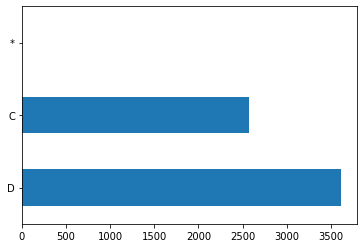

In [51]:
df_simba.NATUREZA_LANCAMENTO.value_counts()

df_simba['NATUREZA_LANCAMENTO'].value_counts().plot(kind='barh')


### Contando créditos e débitos

In [52]:
df_simba_creditos = df_simba_cred_deb[df_simba_cred_deb['NATUREZA_LANCAMENTO'] == 'C']

top_10_C = df_simba_creditos.NOME_PESSOA_OD.value_counts().iloc[:10]
top_10_C

PEBBLES FLINTSTONE LTDA         196
CHOPPER LOUIS LTDA              177
DUKE PAC-BABY COMERCIAL LTDA    165
CHOPPER LOUIS S/A               148
WITCH HAZEL LTDA                 90
JAKE WIGGLES S A                 60
HARVEY SEDUSA LTDA               58
METEOR MAN                       51
GRUESOME GORILLA LTDA            49
RACE BANNON                      47
Name: NOME_PESSOA_OD, dtype: int64

In [53]:
df_simba_debitos = df_simba_cred_deb[df_simba_cred_deb['NATUREZA_LANCAMENTO'] == 'D']

top_10_D = df_simba_debitos.NOME_PESSOA_OD.value_counts().iloc[:10]
top_10_D

FRISKY PUPPY S/A                568
LAZY GRIZZLY                    289
ROVER CLEVEL                    219
SPENCER COGSWELL LTDA           185
CHOPPER LOUIS S/A               148
DUKE PAC-BABY COMERCIAL LTDA    118
SHAGGY ROGERS                    89
PEBBLES FLINTSTONE LTDA          73
MEL SCOOBY-DUM S/A               60
WILE E. COYOTE                   52
Name: NOME_PESSOA_OD, dtype: int64

In [54]:
df_simba_creditos.NOME_PESSOA_OD.value_counts().iloc[:10]
#df_simba_creditos.NOME_PESSOA_OD.value_counts().iloc[:10].sort_values().plot(kind='bar')
#df_simba_creditos.NOME_PESSOA_OD.value_counts().iloc[:10].sort_values().plot(kind='barh')

PEBBLES FLINTSTONE LTDA         196
CHOPPER LOUIS LTDA              177
DUKE PAC-BABY COMERCIAL LTDA    165
CHOPPER LOUIS S/A               148
WITCH HAZEL LTDA                 90
JAKE WIGGLES S A                 60
HARVEY SEDUSA LTDA               58
METEOR MAN                       51
GRUESOME GORILLA LTDA            49
RACE BANNON                      47
Name: NOME_PESSOA_OD, dtype: int64

### Buscando pessoas

In [55]:
# Será que alguém aparece no TOP 10 de créditos e de débitos
top_10 = top_10_C.append(top_10_D)

top_10.sort_values()

#top_10.drop_duplicates().count()

df_top_10 = pd.DataFrame(top_10)
df_top_10

,NOME_PESSOA_OD
PEBBLES FLINTSTONE LTDA,196
CHOPPER LOUIS LTDA,177
DUKE PAC-BABY COMERCIAL LTDA,165
CHOPPER LOUIS S/A,148
WITCH HAZEL LTDA,90
JAKE WIGGLES S A,60
HARVEY SEDUSA LTDA,58
METEOR MAN,51
GRUESOME GORILLA LTDA,49
RACE BANNON,47


### Buscando nomes

In [56]:
df_simba.NOME_PESSOA_OD.unique()

array([nan, 'MAC FRITZ-CARLOS PARTICIPACOES',
       'BAMM BAMM RUBBLE PARTICIPACOES', 'JUDY JETSON S.A.',
       'BIGPAW KWAME LTDA', 'PEBBLES FLINTSTONE LTDA', 'FUZZY LUMPKINS',
       'WILLY MERILEE LTDA', 'POPS SCRAMBLES PRESENTES',
       'BOWLHEAD BURT PRESENTES', 'SPENCER COGSWELL LTDA',
       'MRS. ESCROW PRESENTES', 'ELVIS SHINER', 'CHOMP-CHOMP HIM LTDA',
       'DROOP-A-LONG COYOTE LTDA', 'BRENDA BUDDY', 'MS. BELLUM',
       'ALAN M. MAYBERRY', 'PIGGY BERTIE', 'BUGS BUNNY',
       'PRINCESS MORBUCKS', 'FRED JONES',
       'BUNNY BRAVO COM. IMP. EXP. DE TECIDOS', 'BOOGIE BINGO LTDA',
       'MOJO JOJO', 'MAYOR BOOMBAH CONSULTORIA EM INFORMATICA LTD',
       'HI-RISER BABY', 'PETER POTAMUS', 'BETTY RUBBLE', 'DR. BEN COOPER',
       'SNAGGLEPUSS TOM LTDA', 'BOBO YABBA-DOO LTDA - ME',
       'CAPTAIN PLANET PRESENTES LTDA', 'GRUMPY GRIZZLY', 'PEPE ANNABELL',
       'P.J. MUSHMOUSE', 'PEPE ANNABELL COMERCIO LTDA', 'WILE E. COYOTE ',
       'SCOOBY-DEE REVS', 'DOLLY GRANNY PRESENT

In [57]:
# Preenche valores incorretos
df_simba.loc[df_simba.NOME_PESSOA_OD.isna()] = ""

# Filtra por uma parte do nome
df_lanc_chopper = df_simba[df_simba.NOME_PESSOA_OD.str.contains("CHOPPER LOUIS")]

df_lanc_chopper

# Quando há valores nulos podemos ter problemas. Então, sempre bom, tratar
# os dados faltatnes ou dados incorretos.

,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,CPF_CNPJ_TITULAR,DESCRICAO_LANCAMENTO,CNAB,...,NATUREZA_LANCAMENTO,VALOR_SALDO,NATUREZA_SALDO,CPF_CNPJ_OD,NOME_PESSOA_OD,TIPO_PESSOA_OD,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,OBSERVACAO
1617,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.NUMERARIO,117,...,D,566,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
1618,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,60861566,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
1625,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,1754366,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
1626,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,22205866,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
1627,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,47207366,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,31498508,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN
5436,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,94000,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN
5437,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,126000,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN
5455,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,8904254,C,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN


In [58]:
df_simba.NOME_PESSOA_OD.isnull().sum()

#df_simba.NOME_PESSOA_OD.isna().sum()

#df_simba.loc[df_simba.NOME_PESSOA_OD.isnull()] = "NÃO INFORMADO"

#df_simba
#df_simba.NOME_PESSOA_OD.isnull().sum()

0

In [59]:
# Agora com os dados corrigidos

#df_simba['NOME_PESSOA_OD'].loc[df_simba.NOME_PESSOA_OD.isnull()] = ""

df_lanc_chopper = df_simba[df_simba.NOME_PESSOA_OD.str.contains("CHOPPER LOUIS")]
df_lanc_chopper

,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,CPF_CNPJ_TITULAR,DESCRICAO_LANCAMENTO,CNAB,...,NATUREZA_LANCAMENTO,VALOR_SALDO,NATUREZA_SALDO,CPF_CNPJ_OD,NOME_PESSOA_OD,TIPO_PESSOA_OD,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,OBSERVACAO
1617,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.NUMERARIO,117,...,D,566,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
1618,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,60861566,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
1625,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,1754366,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
1626,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,22205866,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
1627,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,47207366,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,31498508,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN
5436,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,94000,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN
5437,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,126000,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN
5455,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,8904254,C,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN


In [60]:
#df_lanc_chopper.describe()
df_lanc_chopper.info()
df_lanc_chopper.shape 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 1617 to 5464
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NUMERO_CASO                 473 non-null    object
 1   NUMERO_BANCO                473 non-null    object
 2   NOME_BANCO                  473 non-null    object
 3   NUMERO_AGENCIA              473 non-null    object
 4   NUMERO_CONTA                473 non-null    object
 5   TIPO                        473 non-null    object
 6   NOME_TITULAR                473 non-null    object
 7   CPF_CNPJ_TITULAR            473 non-null    object
 8   DESCRICAO_LANCAMENTO        473 non-null    object
 9   CNAB                        473 non-null    object
 10  DATA_LANCAMENTO             473 non-null    object
 11  NUMERO_DOCUMENTO            473 non-null    object
 12  NUMERO_DOCUMENTO_TRANSACAO  296 non-null    object
 13  LOCAL_TRANSACAO             0 non-null      ob

(473, 25)

In [ ]:
df_lanc_chopper.groupby("NUMERO_CONTA_OD").size().sort_values(ascending = False)

In [ ]:
#df_lanc_chopper.groupby("LOCAL_TRANSACAO").size().sort_values(ascending = False)

In [ ]:
#df_simba.groupby("LOCAL_TRANSACAO").size().sort_values(ascending = False)

In [ ]:
df_simba.groupby(["LOCAL_TRANSACAO", "NATUREZA_LANCAMENTO"]).size().sort_values(ascending = False)

In [61]:
# Com uma quantidade grande de categorias e uma disparidade entre os valores das categorias. 
# Vale a pena plotar um gráfico para analisar ?
df_simba.groupby(["LOCAL_TRANSACAO", "NATUREZA_LANCAMENTO"]).size().sort_values(ascending = False).plot(kind='barh')

LOCAL_TRANSACAO       NATUREZA_LANCAMENTO
                                             1397
Ag: 84 - XXV DE MARC  C                        96
Ag: 197 - V.NOVA CON  C                        73
AG.EMP.CAMPINAS - CA  C                        53
Ag: 3208 - DANTAS BA  C                        17
Ag: 114 - BOM RETIRO  C                        13
Ag: 3003 - LGO.SAO B  C                        10
Ag: 1767 - PRIME BOM  C                         9
Ag: 125 - PAULA SOUS  C                         5
Ag: 106 - PARI-USP -  C                         5
Ag: 1992 - R.LUIS GO  C                         3
Ag: 665 - CENTRO EMP  C                         3
Ag: 3550 - RELOGIO S  C                         2
Ag: 1163 - R.DA PRAI  C                         2
Ag: 3389 - AG.EMP.CA  D                         2
Ag: 3239 - PRIME IPI  C                         2
Ag: 500 - PC.DA SE-U  C                         2
Ag: 1899 - S.PEDRO D  C                         2
Ag: 2516 - PRIME ALP  C                         2
Ag: 244 

<AxesSubplot:ylabel='DATA_LANCAMENTO'>

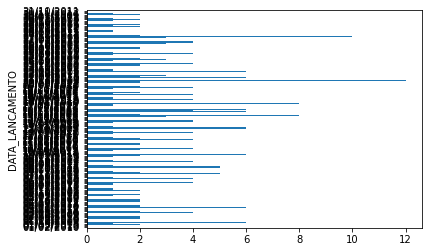

In [62]:
# Podemos analisar temporalmente os dados

df_lanc_chopper.groupby("DATA_LANCAMENTO").size().plot(kind = "barh")


In [63]:
# Precisamos melhorar a visualizacao

df_lanc_chopper["DATA_LANCAMENTO"] = pd.to_datetime(df_lanc_chopper["DATA_LANCAMENTO"])

df_lanc_chopper = pd.DataFrame(df_lanc_chopper)

df_lanc_chopper['ANO_LANCAMENTO'] = pd.DatetimeIndex(df_lanc_chopper['DATA_LANCAMENTO']).year
df_lanc_chopper['MES_LANCAMENTO'] = pd.DatetimeIndex(df_lanc_chopper['DATA_LANCAMENTO']).month

df_lanc_chopper

<ipython-input-63-fb00f5f732bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lanc_chopper["DATA_LANCAMENTO"] = pd.to_datetime(df_lanc_chopper["DATA_LANCAMENTO"])


,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,CPF_CNPJ_TITULAR,DESCRICAO_LANCAMENTO,CNAB,...,NATUREZA_SALDO,CPF_CNPJ_OD,NOME_PESSOA_OD,TIPO_PESSOA_OD,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,OBSERVACAO,ANO_LANCAMENTO,MES_LANCAMENTO
1617,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.NUMERARIO,117,...,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN,2009,9
1618,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN,2009,9
1625,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN,2009,1
1626,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN,2009,1
1627,001-MPF-000000-00,637,Banco Sofisa S/A,1,81132,1,ASTRONALFAS S/A ASTRONOMIA E TECONOLOG,11223397000199,TRANSF.CONF.AUT.,213,...,C,XXXX29046148500071,CHOPPER LOUIS S/A,NaN,637,1,144675.00000,NaN,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN,2013,2
5436,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN,2013,2
5437,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,D,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN,2013,2
5455,001-MPF-000000-00,237,BANCO BRADESCO S/A,3389,12226,1,ASTRONALFAS S/A ASTRONOMIA MELHOR E TECNOLGIA,11223397000199,TED-TRANSF ELET DISPON,209,...,C,XXXX4591440000069,CHOPPER LOUIS LTDA,2.00000,341,355,660477.00000,NaN,2013,1


<AxesSubplot:xlabel='ANO_LANCAMENTO'>

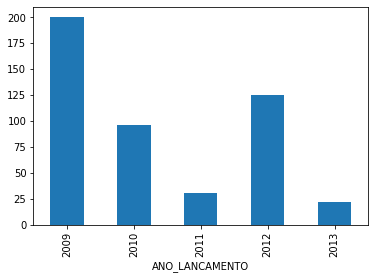

In [64]:
df_lanc_chopper.groupby("ANO_LANCAMENTO").size().plot(kind = "bar")

<AxesSubplot:xlabel='MES_LANCAMENTO'>

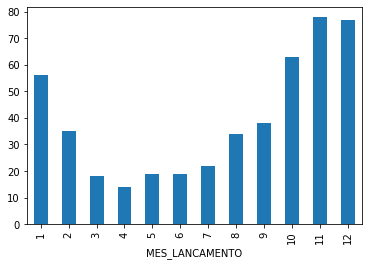

In [65]:
# Vamos avaliar mensalmente. Veja se não há nada errado com esse agrupamento
# de dados.

df_lanc_chopper.groupby("MES_LANCAMENTO").size().plot(kind = "bar")

<AxesSubplot:xlabel='MES_LANCAMENTO,ANO_LANCAMENTO'>

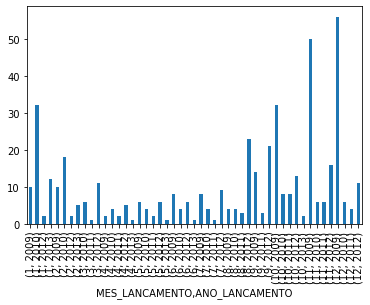

In [66]:
#%matplotlib inline
#import matplotlib.pyplot as plt
# Definições de plotagem
#plt.figure(figsize=(30,30))

df_lanc_chopper.groupby(["MES_LANCAMENTO", "ANO_LANCAMENTO"]).size().plot(kind = "bar")

<AxesSubplot:xlabel='MES_LANCAMENTO,ANO_LANCAMENTO'>

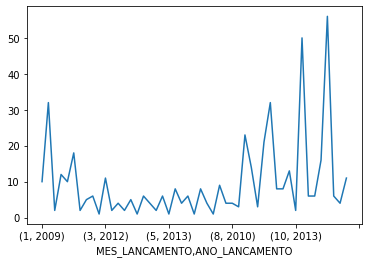

In [67]:
df_lanc_chopper.groupby(["MES_LANCAMENTO", "ANO_LANCAMENTO"]).size().plot(kind = "line")

#df_lanc_chopper.groupby(["MES_LANCAMENTO", "ANO_LANCAMENTO"]).size().sort_values().plot(kind = "line")
#df_lanc_chopper.groupby(["MES_LANCAMENTO", "ANO_LANCAMENTO"]).size().sort_values(ascending=False).plot(kind = "line")

In [68]:
df_lanc_chopper.groupby(["MES_LANCAMENTO", "ANO_LANCAMENTO"]).size()

#df_lanc_chopper.groupby(["ANO_LANCAMENTO", "MES_LANCAMENTO"]).size()


MES_LANCAMENTO  ANO_LANCAMENTO
1               2009              10
                2010              32
                2012               2
                2013              12
2               2009              10
                2010              18
                2012               2
                2013               5
3               2010               6
                2011               1
                2012              11
4               2009               2
                2010               4
                2011               2
                2012               5
                2013               1
5               2009               6
                2010               4
                2011               2
                2012               6
                2013               1
6               2009               8
                2010               4
                2012               6
                2013               1
7               2009               8
       

In [69]:
df_lanc_chopper[df_lanc_chopper['ANO_LANCAMENTO'] == 2009].groupby(["MES_LANCAMENTO", "ANO_LANCAMENTO"]).size()

df_lanc_chopper.groupby(["MES_LANCAMENTO", "ANO_LANCAMENTO"]).size()

MES_LANCAMENTO  ANO_LANCAMENTO
1               2009              10
                2010              32
                2012               2
                2013              12
2               2009              10
                2010              18
                2012               2
                2013               5
3               2010               6
                2011               1
                2012              11
4               2009               2
                2010               4
                2011               2
                2012               5
                2013               1
5               2009               6
                2010               4
                2011               2
                2012               6
                2013               1
6               2009               8
                2010               4
                2012               6
                2013               1
7               2009               8
       

In [70]:
# Mudar a visualização, dependendo da situação
# pode ajudar muito
df_lanc_chopper.groupby(["ANO_LANCAMENTO", "MES_LANCAMENTO"]).size().unstack(0)

ANO_LANCAMENTO,2009,2010,2011,2012,2013
MES_LANCAMENTO,,,,,
1,10.00000,32.00000,nan,2.00000,12.00000
2,10.00000,18.00000,nan,2.00000,5.00000
3,nan,6.00000,1.00000,11.00000,nan
4,2.00000,4.00000,2.00000,5.00000,1.00000
5,6.00000,4.00000,2.00000,6.00000,1.00000
6,8.00000,4.00000,nan,6.00000,1.00000
7,8.00000,4.00000,1.00000,9.00000,nan
8,4.00000,4.00000,3.00000,23.00000,nan
9,14.00000,nan,3.00000,21.00000,nan


array([<AxesSubplot:title={'center':'2009'}, xlabel='MES_LANCAMENTO'>,
       <AxesSubplot:title={'center':'2010'}, xlabel='MES_LANCAMENTO'>,
       <AxesSubplot:title={'center':'2011'}, xlabel='MES_LANCAMENTO'>,
       <AxesSubplot:title={'center':'2012'}, xlabel='MES_LANCAMENTO'>,
       <AxesSubplot:title={'center':'2013'}, xlabel='MES_LANCAMENTO'>],
      dtype=object)

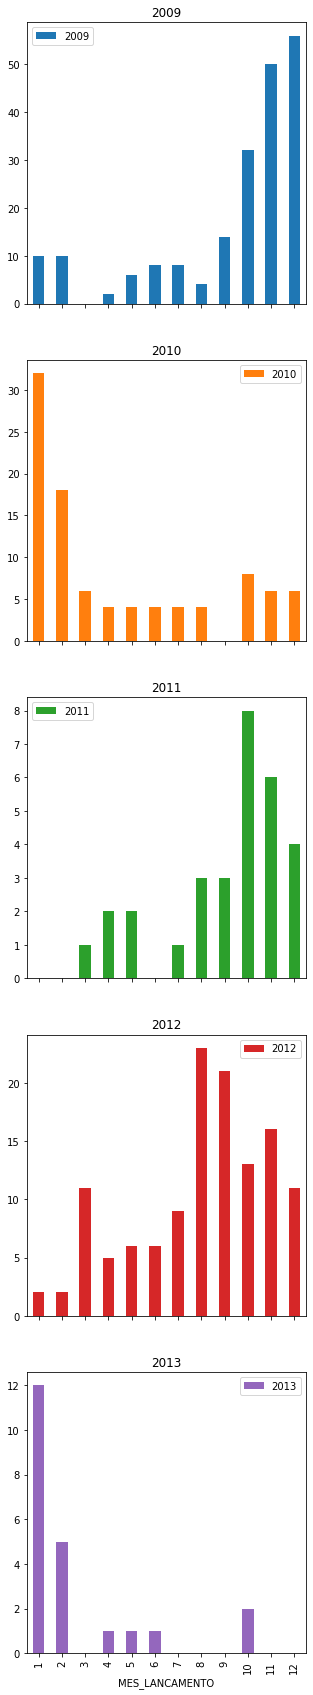

In [71]:
# Melhor visualizarmos por meio de gráficos
df_lanc_chopper.groupby(["ANO_LANCAMENTO", "MES_LANCAMENTO"]).size().unstack(0).plot(subplots=True, kind = 'bar', figsize = (5, 30))


### Avaliando pelas totalizações

In [75]:
df_simba['VALOR_TRANSACAO'].unique()

array(['', 1252, 341, ..., 14, 673, 151], dtype=object)

In [82]:
df_simba['VALOR_TRANSACAO'].loc[df_simba['VALOR_TRANSACAO'] == ''] = 0
df_simba['VALOR_TRANSACAO'] = pd.to_numeric(df_simba['VALOR_TRANSACAO'])

#df_simba['VALOR_TRANSACAO'] = df_simba['VALOR_TRANSACAO'].astype(float)

df_simba.groupby(["LOCAL_TRANSACAO", "NATUREZA_LANCAMENTO"])[['VALOR_TRANSACAO']].sum()
df_val_agencias = df_simba.groupby(["LOCAL_TRANSACAO", "NATUREZA_LANCAMENTO"])[['VALOR_TRANSACAO']].sum().sort_values(by="VALOR_TRANSACAO")

df_val_agencias


,,VALOR_TRANSACAO
LOCAL_TRANSACAO,NATUREZA_LANCAMENTO,
,,0.00000
Ag: 458 - SOBRAL-CEN,C,10000.00000
Ag: 105 - PC.OSWALDO,C,15000.00000
Ag: 1163 - R.DA PRAI,C,15000.00000
Ag: 433 - ANDRADAS-U,C,20000.00000
Ag: 2675 - R.ANTONIO,C,28100.00000
Ag: 408 - S.LUIS-CEN,C,30000.00000
Ag: 405 - TERESINA-C,C,30000.00000
Ag: 464 - COMERCIO-U,C,37600.00000


In [89]:
# Separa data do lancamento em mês e ano, criando uma nova coluna
df_simba["DATA_LANCAMENTO"] = pd.to_datetime(df_simba["DATA_LANCAMENTO"])
df_simba['ANO_LANCAMENTO'] = pd.DatetimeIndex(df_simba['DATA_LANCAMENTO']).year
df_simba['MES_LANCAMENTO'] = pd.DatetimeIndex(df_simba['DATA_LANCAMENTO']).month

In [ ]:
# Plota por mes do lancamento
plt.figure(figsize=(30,30))
df_simba.sort_values(by='MES_LANCAMENTO').plot(x='MES_LANCAMENTO', y='VALOR_TRANSACAO', kind='line')

<AxesSubplot:xlabel='MES_LANCAMENTO', ylabel='VALOR_TRANSACAO'>

<Figure size 2160x2160 with 0 Axes>

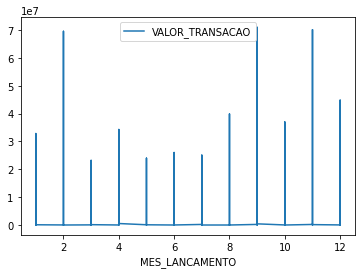

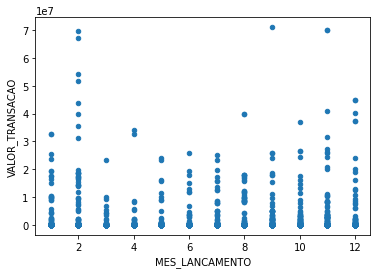

In [93]:
# Melhor tentar um outro gráfico
df_simba.sort_values(by='MES_LANCAMENTO').plot(x='MES_LANCAMENTO', y='VALOR_TRANSACAO', kind='scatter')

<AxesSubplot:title={'center':'VALOR_TRANSACAO'}, xlabel='NOME_PESSOA_OD'>

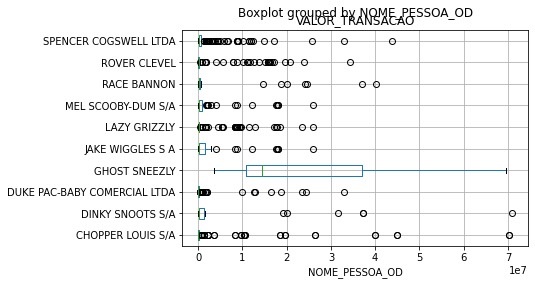

In [182]:
# Boxplot para comparar as 10 pessoas com maior volume de transação

df_val_pessoas = df_simba.groupby(["NOME_PESSOA_OD"])[['VALOR_TRANSACAO']].sum().sort_values(by="VALOR_TRANSACAO", ascending=False)
df_list_pessoas = df_val_pessoas.index.to_list()

df_maiores = df_simba[df_simba.NOME_PESSOA_OD.isin(df_list_pessoas[:10])]
df_maiores.boxplot(by='NOME_PESSOA_OD', column=['VALOR_TRANSACAO'], vert=False)